### Location Visualization 

For data visualization, we felt it was important to preserve the true distribution of the data while being able to handle great amounts. We decided to use datashader because it combats the common issues with undersampling, saturation, or overplotting that come with visualizing such large datasets. In addition, we used bokeh to take the static visualizations produced by datashader and convert them to interactive plots. 

In [1]:
import datashader as ds
import datashader.transfer_functions as tf
from datashader.bokeh_ext import InteractiveImage
from datashader.utils import export_image
from datashader.colors import colormap_select
from bokeh.plotting import figure
from bokeh.models import HoverTool
from bokeh.layouts import layout, row, column
from bokeh.io import show, push_notebook, output_notebook
import seaborn as sns
import pandas as pd
from IPython.core.display import HTML, display

display(HTML("<style>.container { width:90% !important; }</style>"))
output_notebook()

Loading BokehJS ...

In [2]:
def sns_to_bokeh_palette(sns_palette, count):
    palette = []
    for tup in sns.color_palette(sns_palette, count):
        red, green, blue = tup
        red *= 255
        green *= 255
        blue *= 255
        palette.append('#%02x%02x%02x' % (int(round(red)), int(round(green)), int(round(blue))))
    return palette

In [81]:
def create_datashader_img(data, x, y, threshold=.2, px=4):
    cvs = ds.Canvas(plot_width=500, plot_height=500)
    agg = cvs.points(data, x, y)
    img = tf.shade(agg, cmap=large_palette, how='eq_hist')
    return tf.dynspread(img, threshold=threshold, max_px=px)

In [4]:
def create_bokeh_plot(title, width=500, height=500):  
    
    
    TOOLS = "pan,wheel_zoom,box_zoom,reset,save"
    base_plot = figure(title=title, tools=TOOLS, x_axis_location=None, y_axis_location=None, 
                       plot_width=width, plot_height=height, toolbar_location="above")
    base_plot.grid.grid_line_color = "SlateGray"
    base_plot.grid.grid_line_alpha = .5
    base_plot.grid.minor_grid_line_color = "SlateGray"
    base_plot.grid.minor_grid_line_alpha = .2
    return base_plot

In [55]:
large_palette = sns_to_bokeh_palette("Blues_d", 20)
large_palette.reverse()

In [6]:
geo_df = pd.read_csv('/Users/Rishi/Downloads/sample_geo.txt', sep='\t')
geo_df.head()

,Latitude,Longitude,LocationID
0,37.772539,-77.499550,1
1,42.090133,-87.689156,2
2,39.563418,-75.587532,3
3,39.453023,-87.693741,4
4,38.953799,-77.016563,5


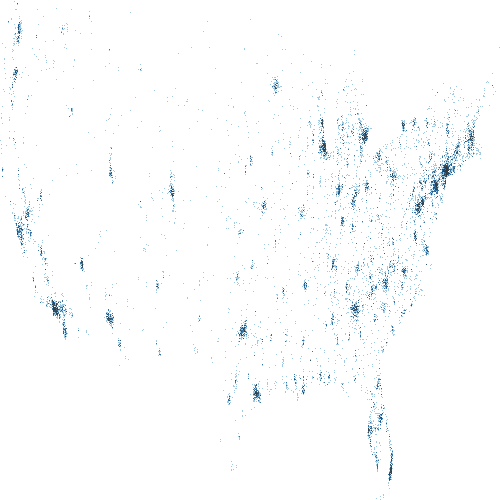

In [104]:
step2 = create_datashader_img(geo_df, 'Longitude', 'Latitude', .32, 25)
step2

In [11]:
dbpedia_df = pd.read_csv("/Users/Rishi/Downloads/lat_longs", sep=' ', names=["Latitude", "Longitude", "Link"])
dbpedia_df.head()

,Latitude,Longitude,Link
0,36.700000,3.216667,<http://dbpedia.org/resource/Algeria>
1,42.500000,1.516667,<http://dbpedia.org/resource/Andorra>
2,12.516667,-70.033333,<http://dbpedia.org/resource/Aruba>
3,-8.833333,13.333333,<http://dbpedia.org/resource/Angola>
4,41.333333,19.800000,<http://dbpedia.org/resource/Albania>


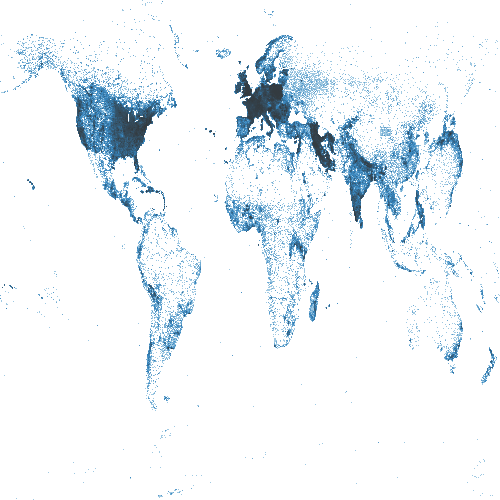

In [92]:
step3 = create_datashader_img(dbpedia_df, 'Longitude', 'Latitude', .001, 10)
step3

In [76]:
x_range=(min(dbpedia_df["Longitude"]), max(dbpedia_df["Longitude"]))
y_range=(min(dbpedia_df["Latitude"]), max(dbpedia_df["Latitude"]))

def create_image(x_range=x_range, y_range=y_range, w=500, h=500):
    cvs = ds.Canvas(x_range=x_range, y_range=y_range, plot_height=h, plot_width=w)
    agg = cvs.points(dbpedia_df, 'Longitude', 'Latitude')
    return tf.shade(agg, cmap=large_palette, how='eq_hist')


def base_plot():
    TOOLS = "pan,wheel_zoom,box_zoom,reset,save"
    p = figure(tools=TOOLS, plot_width=500, plot_height=500,
        x_range=x_range, y_range=y_range, outline_line_color=None,
        min_border=0, min_border_left=0, min_border_right=0,
        min_border_top=0, min_border_bottom=0)   
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    return p

In [77]:
p = base_plot()
x = InteractiveImage(p, create_image)

In [78]:
x

In [17]:
device_status = pd.read_csv("/Users/Rishi/Github/geolocation/spark/part-m-00000", names=["timestamp", "name", "code", "lat", "long"])
device_status.head()

,timestamp,name,code,lat,long
0,2014-03-15:10:10:20,Sorrento,F41L,33.689475,-117.543308
1,2014-03-15:10:10:20,Sorrento,F41L,39.363519,-119.400335
2,2014-03-15:10:10:20,Ronin,Novelty Note 1,33.191358,-116.448243
3,2014-03-15:10:10:20,Sorrento,F41L,33.834354,-117.330001
4,2014-03-15:10:10:20,Sorrento,F33L,37.380395,-121.840757


In [42]:
x_range=(min(device_status["long"]), max(device_status["long"]))
y_range=(min(device_status["lat"]), max(device_status["lat"]))

def create_image(x_range=x_range, y_range=y_range, w=700, h=700):
    cvs = ds.Canvas(x_range=x_range, y_range=y_range, plot_height=h, plot_width=w)
    agg = cvs.points(device_status, 'long', 'lat')
    return tf.shade(agg, cmap=large_palette, how='eq_hist')

def base_plot():
    TOOLS = "pan,wheel_zoom,box_zoom,hover,reset,save"
    p = figure(tools=TOOLS, plot_width=700, plot_height=700,
        x_range=x_range, y_range=y_range, outline_line_color=None,
        min_border=0, min_border_left=0, min_border_right=0,
        min_border_top=0, min_border_bottom=0)   
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    return p

In [43]:
p = base_plot()
x = InteractiveImage(p, create_image)

In [44]:
x